
Dataset Preview:


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0



Dataset Shape: (1025, 14)

Dataset After Encoding:


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,3,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,4,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,4,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,1,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,2,0,0



Entropy of Target: 0.9994994187527655
Gini Index of Target: 0.49965306365258777

Accuracy (No Pruning): 0.9853658536585366
Accuracy (Pre-Pruning): 0.824390243902439
Accuracy (Post-Pruning): 0.9317073170731708

Classification Report (Pre-Pruned Model):
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       102
           1       0.77      0.93      0.84       103

    accuracy                           0.82       205
   macro avg       0.84      0.82      0.82       205
weighted avg       0.84      0.82      0.82       205



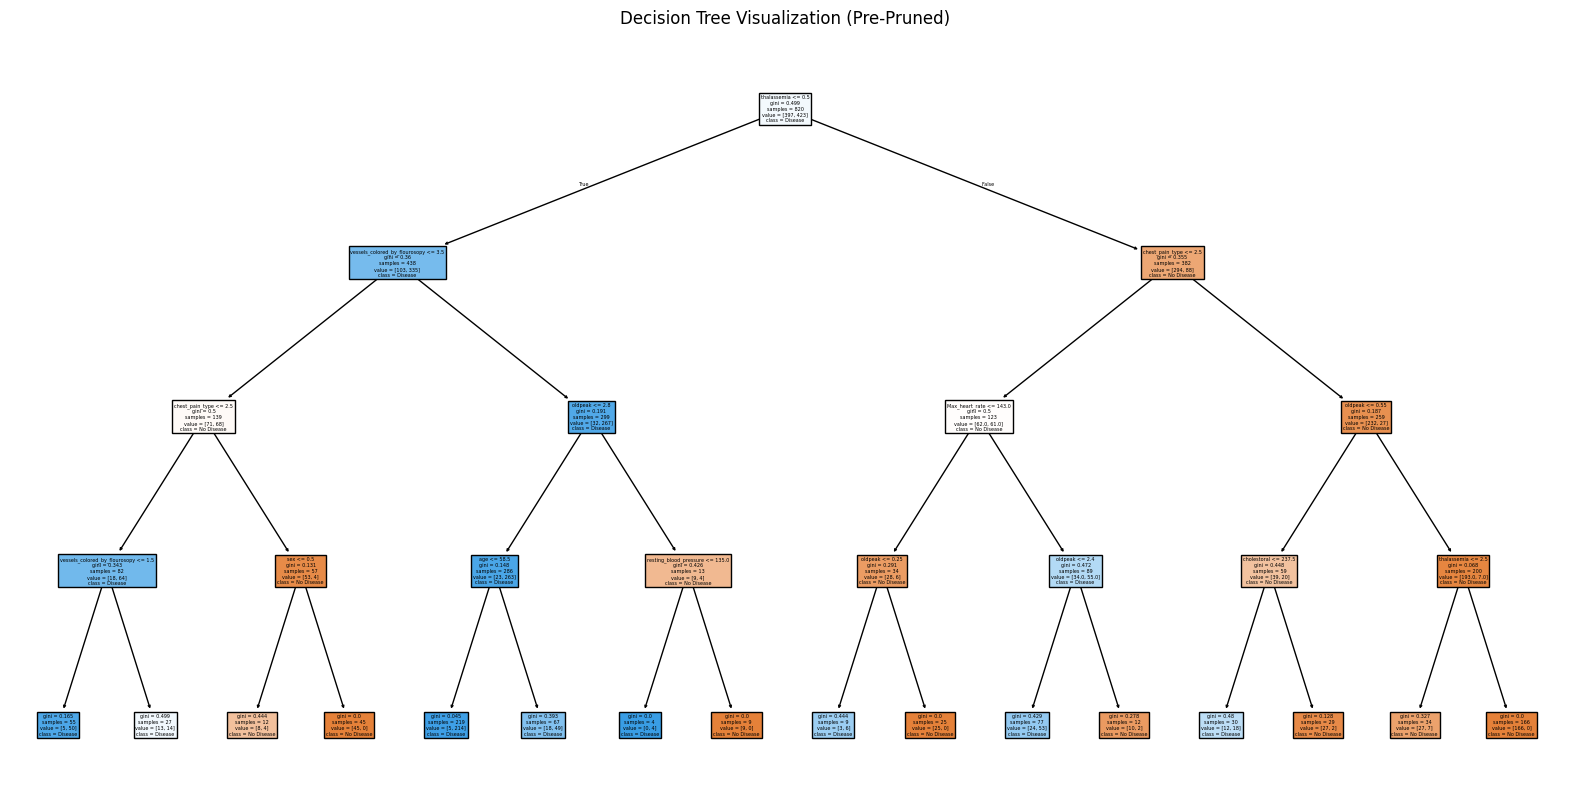


Feature Importance:


,Feature,Importance
12,thalassemia,0.431092
2,chest_pain_type,0.215679
11,vessels_colored_by_flourosopy,0.132132
9,oldpeak,0.106041
7,Max_heart_rate,0.034754
4,cholestoral,0.030136
0,age,0.022469
3,resting_blood_pressure,0.020069
1,sex,0.007629
8,exercise_induced_angina,0.000000


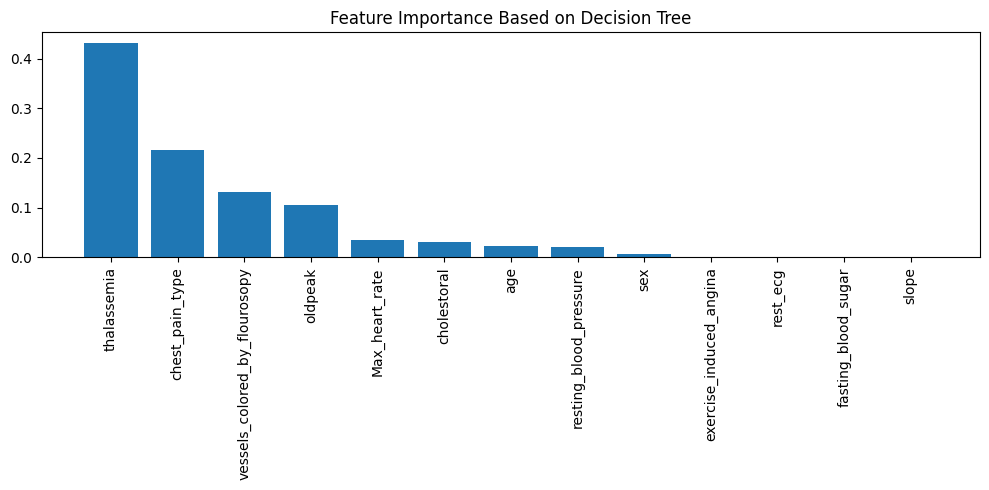

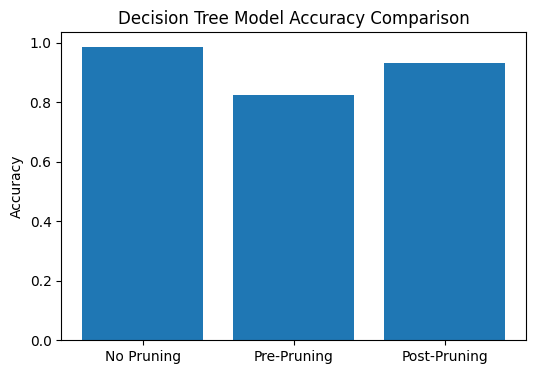


PROJECT EXECUTED SUCCESSFULLY


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. IMPORT LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


# 2. LOAD DATASET
df = pd.read_csv("heart.csv")

print("\nDataset Preview:")
display(df.head())
print("\nDataset Shape:", df.shape)


#  FIX: HANDLE CATEGORICAL DATA

label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

print("\nDataset After Encoding:")
display(df.head())


# 3. MATHEMATICAL CALCULATIONS

def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

def gini_index(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities ** 2)

print("\nEntropy of Target:", entropy(df['target']))
print("Gini Index of Target:", gini_index(df['target']))


# 4. FEATURE & TARGET SPLIT
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 5. DECISION TREE (NO PRUNING)
dt_full = DecisionTreeClassifier(
    criterion='gini',
    random_state=42
)

dt_full.fit(X_train, y_train)
y_pred_full = dt_full.predict(X_test)

acc_full = accuracy_score(y_test, y_pred_full)
print("\nAccuracy (No Pruning):", acc_full)


# 6. PRE-PRUNING
dt_pre_pruned = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    min_samples_split=10,
    random_state=42
)

dt_pre_pruned.fit(X_train, y_train)
y_pred_pre = dt_pre_pruned.predict(X_test)

acc_pre = accuracy_score(y_test, y_pred_pre)
print("Accuracy (Pre-Pruning):", acc_pre)


# 7. POST-PRUNING
path = dt_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

dt_post_pruned = DecisionTreeClassifier(
    random_state=42,
    ccp_alpha=ccp_alphas[5]
)

dt_post_pruned.fit(X_train, y_train)
y_pred_post = dt_post_pruned.predict(X_test)

acc_post = accuracy_score(y_test, y_pred_post)
print("Accuracy (Post-Pruning):", acc_post)


# 8. CLASSIFICATION REPORT
print("\nClassification Report (Pre-Pruned Model):")
print(classification_report(y_test, y_pred_pre))


# 9. DECISION TREE VISUALIZATION
plt.figure(figsize=(20, 10))
plot_tree(
    dt_pre_pruned,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True
)
plt.title("Decision Tree Visualization (Pre-Pruned)")
plt.show()


# 10. FEATURE IMPORTANCE
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_pre_pruned.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
display(feature_importance)


# 11. FEATURE IMPORTANCE VISUALIZATION
plt.figure(figsize=(10, 5))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=90)
plt.title("Feature Importance Based on Decision Tree")
plt.tight_layout()
plt.show()


# 12. ACCURACY COMPARISON
models = ['No Pruning', 'Pre-Pruning', 'Post-Pruning']
accuracies = [acc_full, acc_pre, acc_post]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("Decision Tree Model Accuracy Comparison")
plt.show()


print("\nPROJECT EXECUTED SUCCESSFULLY")
